#Economic Data Analysis

In [ ]:
!pip install fredapi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

from google.colab import userdata
fred_key = userdata.get('fred-api')

#1. Create Fred Object

In [ ]:
fred = Fred(api_key = fred_key)

#2. Search for Economic data

In [ ]:
sp_search = fred.search('S&P', order_by='popularity')

In [ ]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-01-01,2024-01-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-12-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-29 09:58:05-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-01-01,2024-01-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-12-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-01-01,2024-01-01,S&P 500,2013-12-30,2023-12-29,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-12-29 19:11:01-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-01-01,2024-01-01,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-01-01,2024-01-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-12-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-29 09:58:08-06:00,82,This data represents the effective yield of th...


#3. Pull Raw Data and plot

<Axes: title={'center': 'S&P 500'}>

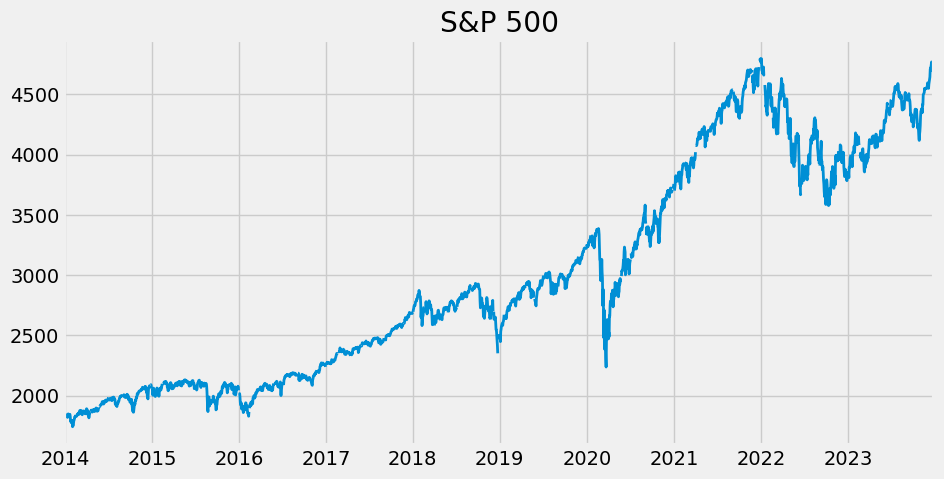

In [ ]:
sp500 = fred.get_series('SP500')
sp500.plot(figsize=(10,5), title = 'S&P 500', lw = 2)

#4. Pull and Join Multiple Data Series

In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.loc[unemp_df['id'].str.contains('UR')]

In [ ]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-01-01,2024-01-01,Unemployment Rate in California,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:24:01-06:00,61,None
TXUR,TXUR,2024-01-01,2024-01-01,Unemployment Rate in Texas,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:23:03-06:00,46,None
FLUR,FLUR,2024-01-01,2024-01-01,Unemployment Rate in Florida,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:24:02-06:00,44,None
NYUR,NYUR,2024-01-01,2024-01-01,Unemployment Rate in New York,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:23:02-06:00,44,None
OHUR,OHUR,2024-01-01,2024-01-01,Unemployment Rate in Ohio,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:23:04-06:00,35,None
ILUR,ILUR,2024-01-01,2024-01-01,Unemployment Rate in Illinois,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:24:05-06:00,24,None
NJUR,NJUR,2024-01-01,2024-01-01,Unemployment Rate in New Jersey,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:23:11-06:00,17,None
PAUR,PAUR,2024-01-01,2024-01-01,Unemployment Rate in Pennsylvania,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:23:04-06:00,32,None
ALUR,ALUR,2024-01-01,2024-01-01,Unemployment Rate in Alabama,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:24:03-06:00,25,None


In [ ]:
all_results = []
for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)

In [ ]:
uemp_states = pd.concat(all_results, axis=1).drop(['CMWRUR', 'CSOUUR', 'CWSTUR', 'CNEWUR', 'CNERUR'], axis=1 )
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [ ]:
#plot states unemployment rate
px.line(uemp_states)

#5. Pull 2020 unemployment Rate per State

In [ ]:
uemp_states

,California,Texas,Florida,New York,Ohio,Illinois,New Jersey,Pennsylvania,Alabama,Michigan,Kentucky,Georgia,Colorado,Arizona,Massachusetts,Tennessee,Virginia,Minnesota,North Carolina,Louisiana,Washington,Oregon,South Carolina,Wisconsin,Maryland,Hawaii,Iowa,Missouri,Indiana,Arkansas,Puerto Rico,Oklahoma,West Virginia,Nevada,New Mexico,Alaska,Mississippi,Utah,Montana,Idaho,Connecticut,Maine,North Dakota,New Hampshire,the District of Columbia,Rhode Island,Kansas,Delaware,Nebraska,Wyoming,Vermont,South Dakota
1976-01-01,9.2,5.8,9.7,10.3,8.1,6.6,10.3,8.0,6.6,9.9,5.6,8.4,5.8,10.2,10.5,6.0,6.1,6.0,6.4,6.3,8.5,9.5,7.4,5.8,6.4,9.8,4.3,5.9,6.6,7.3,19.6,5.8,7.5,9.2,8.6,7.1,6.7,5.8,5.8,5.6,9.8,8.7,3.4,6.5,8.7,7.8,4.2,8.0,3.3,4.1,8.6,3.3
1976-02-01,9.2,5.8,9.7,10.3,8.1,6.6,10.3,8.1,6.6,9.9,5.6,8.4,5.7,10.2,10.5,6.0,6.1,6.0,6.4,6.3,8.5,9.5,7.4,5.8,6.4,9.8,4.3,5.9,6.6,7.3,19.5,5.8,7.5,9.2,8.7,7.1,6.7,5.9,5.8,5.6,9.8,8.7,3.4,6.5,8.7,7.8,4.2,8.0,3.3,4.1,8.6,3.3
1976-03-01,9.1,5.9,9.6,10.2,8.1,6.6,10.3,8.1,6.6,9.9,5.6,8.4,5.7,10.1,10.5,6.0,6.1,5.9,6.4,6.3,8.4,9.4,7.3,5.7,6.4,9.8,4.3,5.9,6.5,7.3,19.3,5.8,7.5,9.2,8.7,7.0,6.6,5.8,5.8,5.6,9.8,8.6,3.4,6.5,8.6,7.7,4.2,8.0,3.3,4.1,8.6,3.2
1976-04-01,9.1,5.9,9.5,10.2,8.0,6.6,10.3,8.1,6.5,9.8,5.6,8.3,5.6,10.0,10.3,6.0,6.0,5.8,6.3,6.4,8.5,9.2,7.2,5.6,6.4,9.7,4.2,6.0,6.3,7.2,19.0,5.8,7.5,9.0,8.6,6.9,6.4,5.8,5.8,5.6,9.6,8.6,3.5,6.5,8.5,7.7,4.2,8.1,3.2,4.0,8.6,3.1
1976-05-01,9.0,5.9,9.3,10.1,7.8,6.6,10.3,8.1,6.4,9.6,5.5,8.1,5.6,9.8,10.1,5.9,5.9,5.7,6.1,6.5,8.5,9.1,7.0,5.5,6.5,9.4,4.1,6.0,6.0,7.1,18.9,5.7,7.4,8.9,8.6,6.9,6.3,5.7,5.8,5.6,9.4,8.5,3.6,6.5,8.4,7.7,4.2,8.3,3.1,3.9,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,4.6,4.1,2.7,3.9,3.3,4.0,3.9,3.5,2.1,3.6,3.9,3.2,2.9,3.6,2.5,3.1,2.5,3.0,3.3,3.4,3.6,3.4,3.1,2.6,1.8,2.8,2.7,2.7,3.3,2.6,6.2,2.7,3.4,5.3,3.6,3.8,3.0,2.4,2.5,2.8,3.6,2.4,2.0,1.7,5.0,2.8,2.7,4.1,2.0,3.0,1.8,1.9
2023-08-01,4.6,4.1,2.7,3.9,3.4,4.1,4.2,3.5,2.1,3.7,4.0,3.3,3.1,3.8,2.6,3.1,2.5,3.1,3.3,3.3,3.6,3.4,3.0,2.9,1.7,2.8,2.9,2.8,3.4,2.7,6.2,2.8,3.6,5.4,3.7,3.9,3.2,2.5,2.5,3.0,3.5,2.5,1.9,1.8,5.0,2.7,2.7,4.1,2.0,2.9,1.8,1.9
2023-09-01,4.7,4.1,2.8,4.0,3.4,4.4,4.4,3.4,2.2,3.9,4.1,3.4,3.2,4.0,2.6,3.2,2.5,3.1,3.4,3.3,3.6,3.5,2.9,3.1,1.6,2.8,3.0,2.9,3.6,2.9,6.0,3.0,3.8,5.4,3.7,4.1,3.2,2.6,2.7,3.1,3.5,2.7,1.9,2.0,5.0,2.6,2.8,4.1,2.1,2.9,1.9,1.9
2023-10-01,4.8,4.1,2.8,4.2,3.6,4.6,4.6,3.4,2.3,4.1,4.2,3.4,3.3,4.2,2.8,3.3,2.7,3.2,3.4,3.3,3.8,3.6,2.9,3.2,1.7,2.9,3.2,3.1,3.6,3.1,5.8,3.2,4.0,5.4,3.8,4.3,3.3,2.7,2.8,3.2,3.5,2.8,1.9,2.1,5.0,2.7,2.9,4.2,2.2,2.9,2.0,2.0


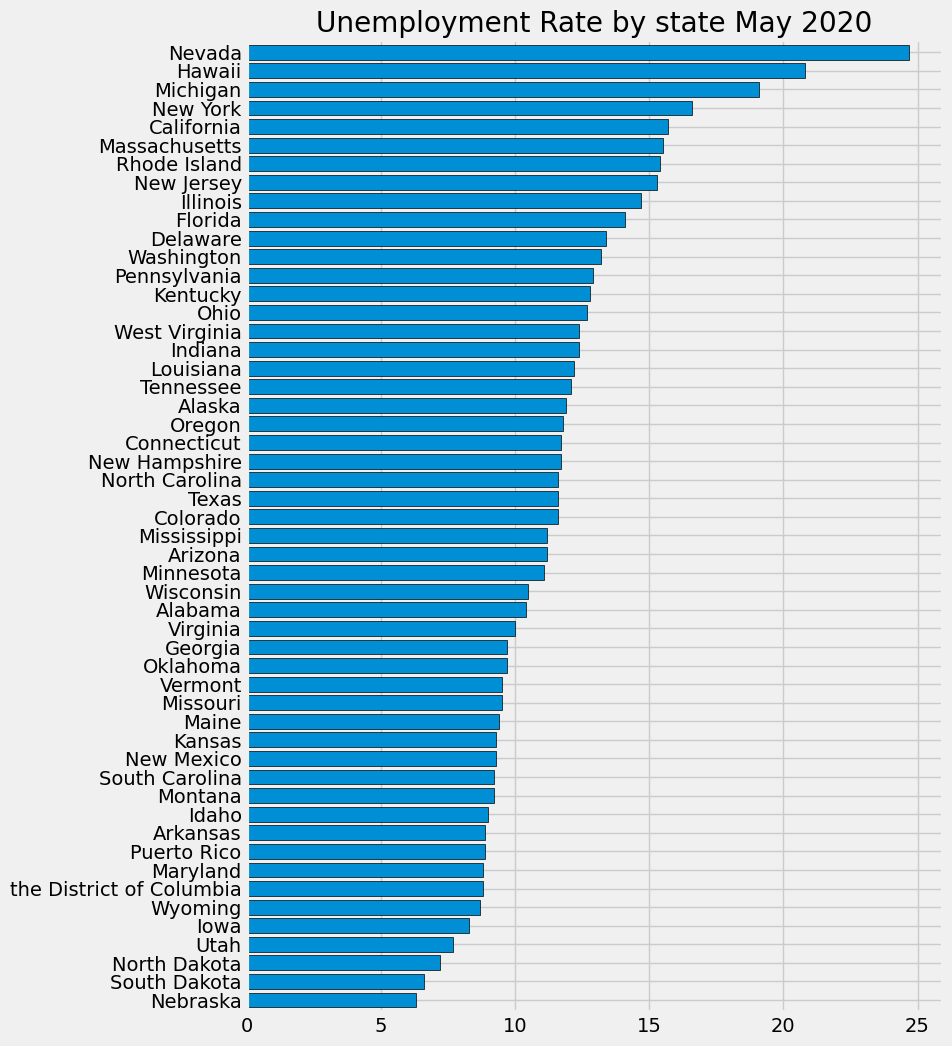

In [ ]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
.sort_values('2020-05-01') \
.plot(kind='barh', figsize=(8, 12), width=0.8, edgecolor = 'black', title='Unemployment Rate by state May 2020')
ax.legend().remove()

#6. Pull Participation Rate

In [ ]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
#part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation')]
part_df = part_df.loc[part_df['id'].str.contains('LBS')]

In [ ]:
part_df.shape

(51, 15)

In [ ]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()
#part_df.columns = [part_id_to_state[c] for c in part_df.columns]
#part_id_to_state

all_results = []
for myid in part_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

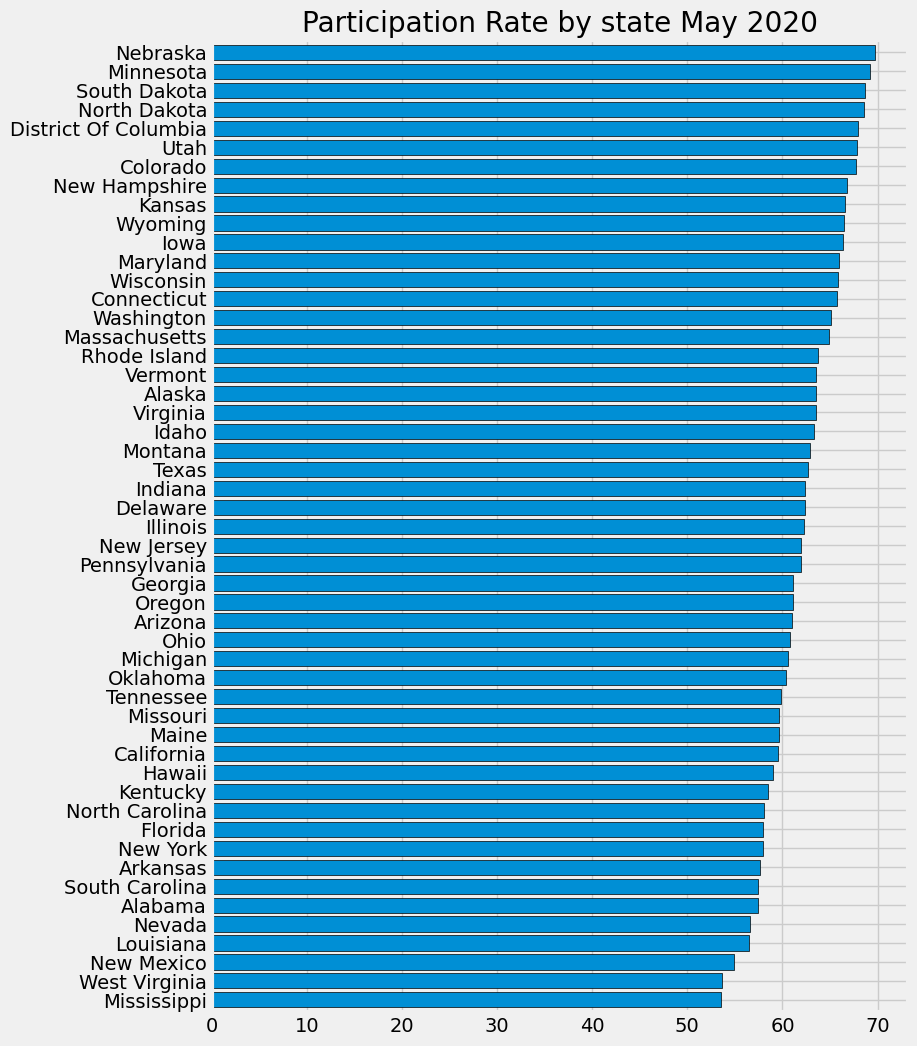

In [ ]:
ax2 = part_states.loc[part_states.index == '2020-05-01'].T \
.sort_values('2020-05-01') \
.plot(kind='barh', figsize=(8, 12), width=0.8, edgecolor = 'black', title='Participation Rate by state May 2020')
ax2.legend().remove()

#7. Plot Unemployment vs Participation

Text(0.5, 1.0, 'New York')

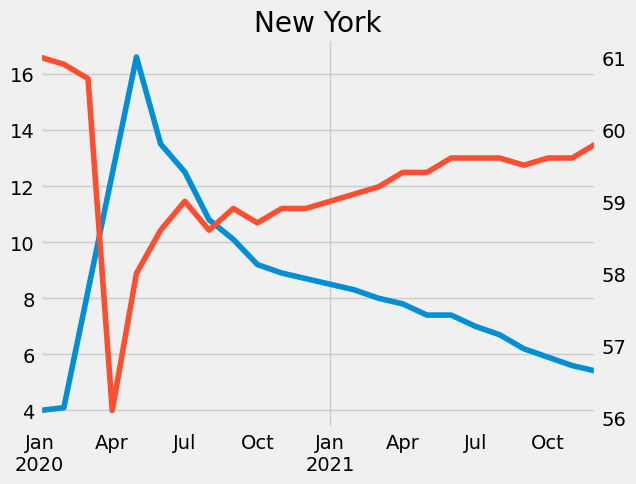

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
#uemp_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label='Unemployment')
part_states.query('index >= 2020 and index < 2022')['New York'] \
.plot(ax=ax2, label='Participation', color=color_pal[1])
uemp_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label='Unemployment')
ax2.grid(False)
ax.set_title('New York')

In [ ]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

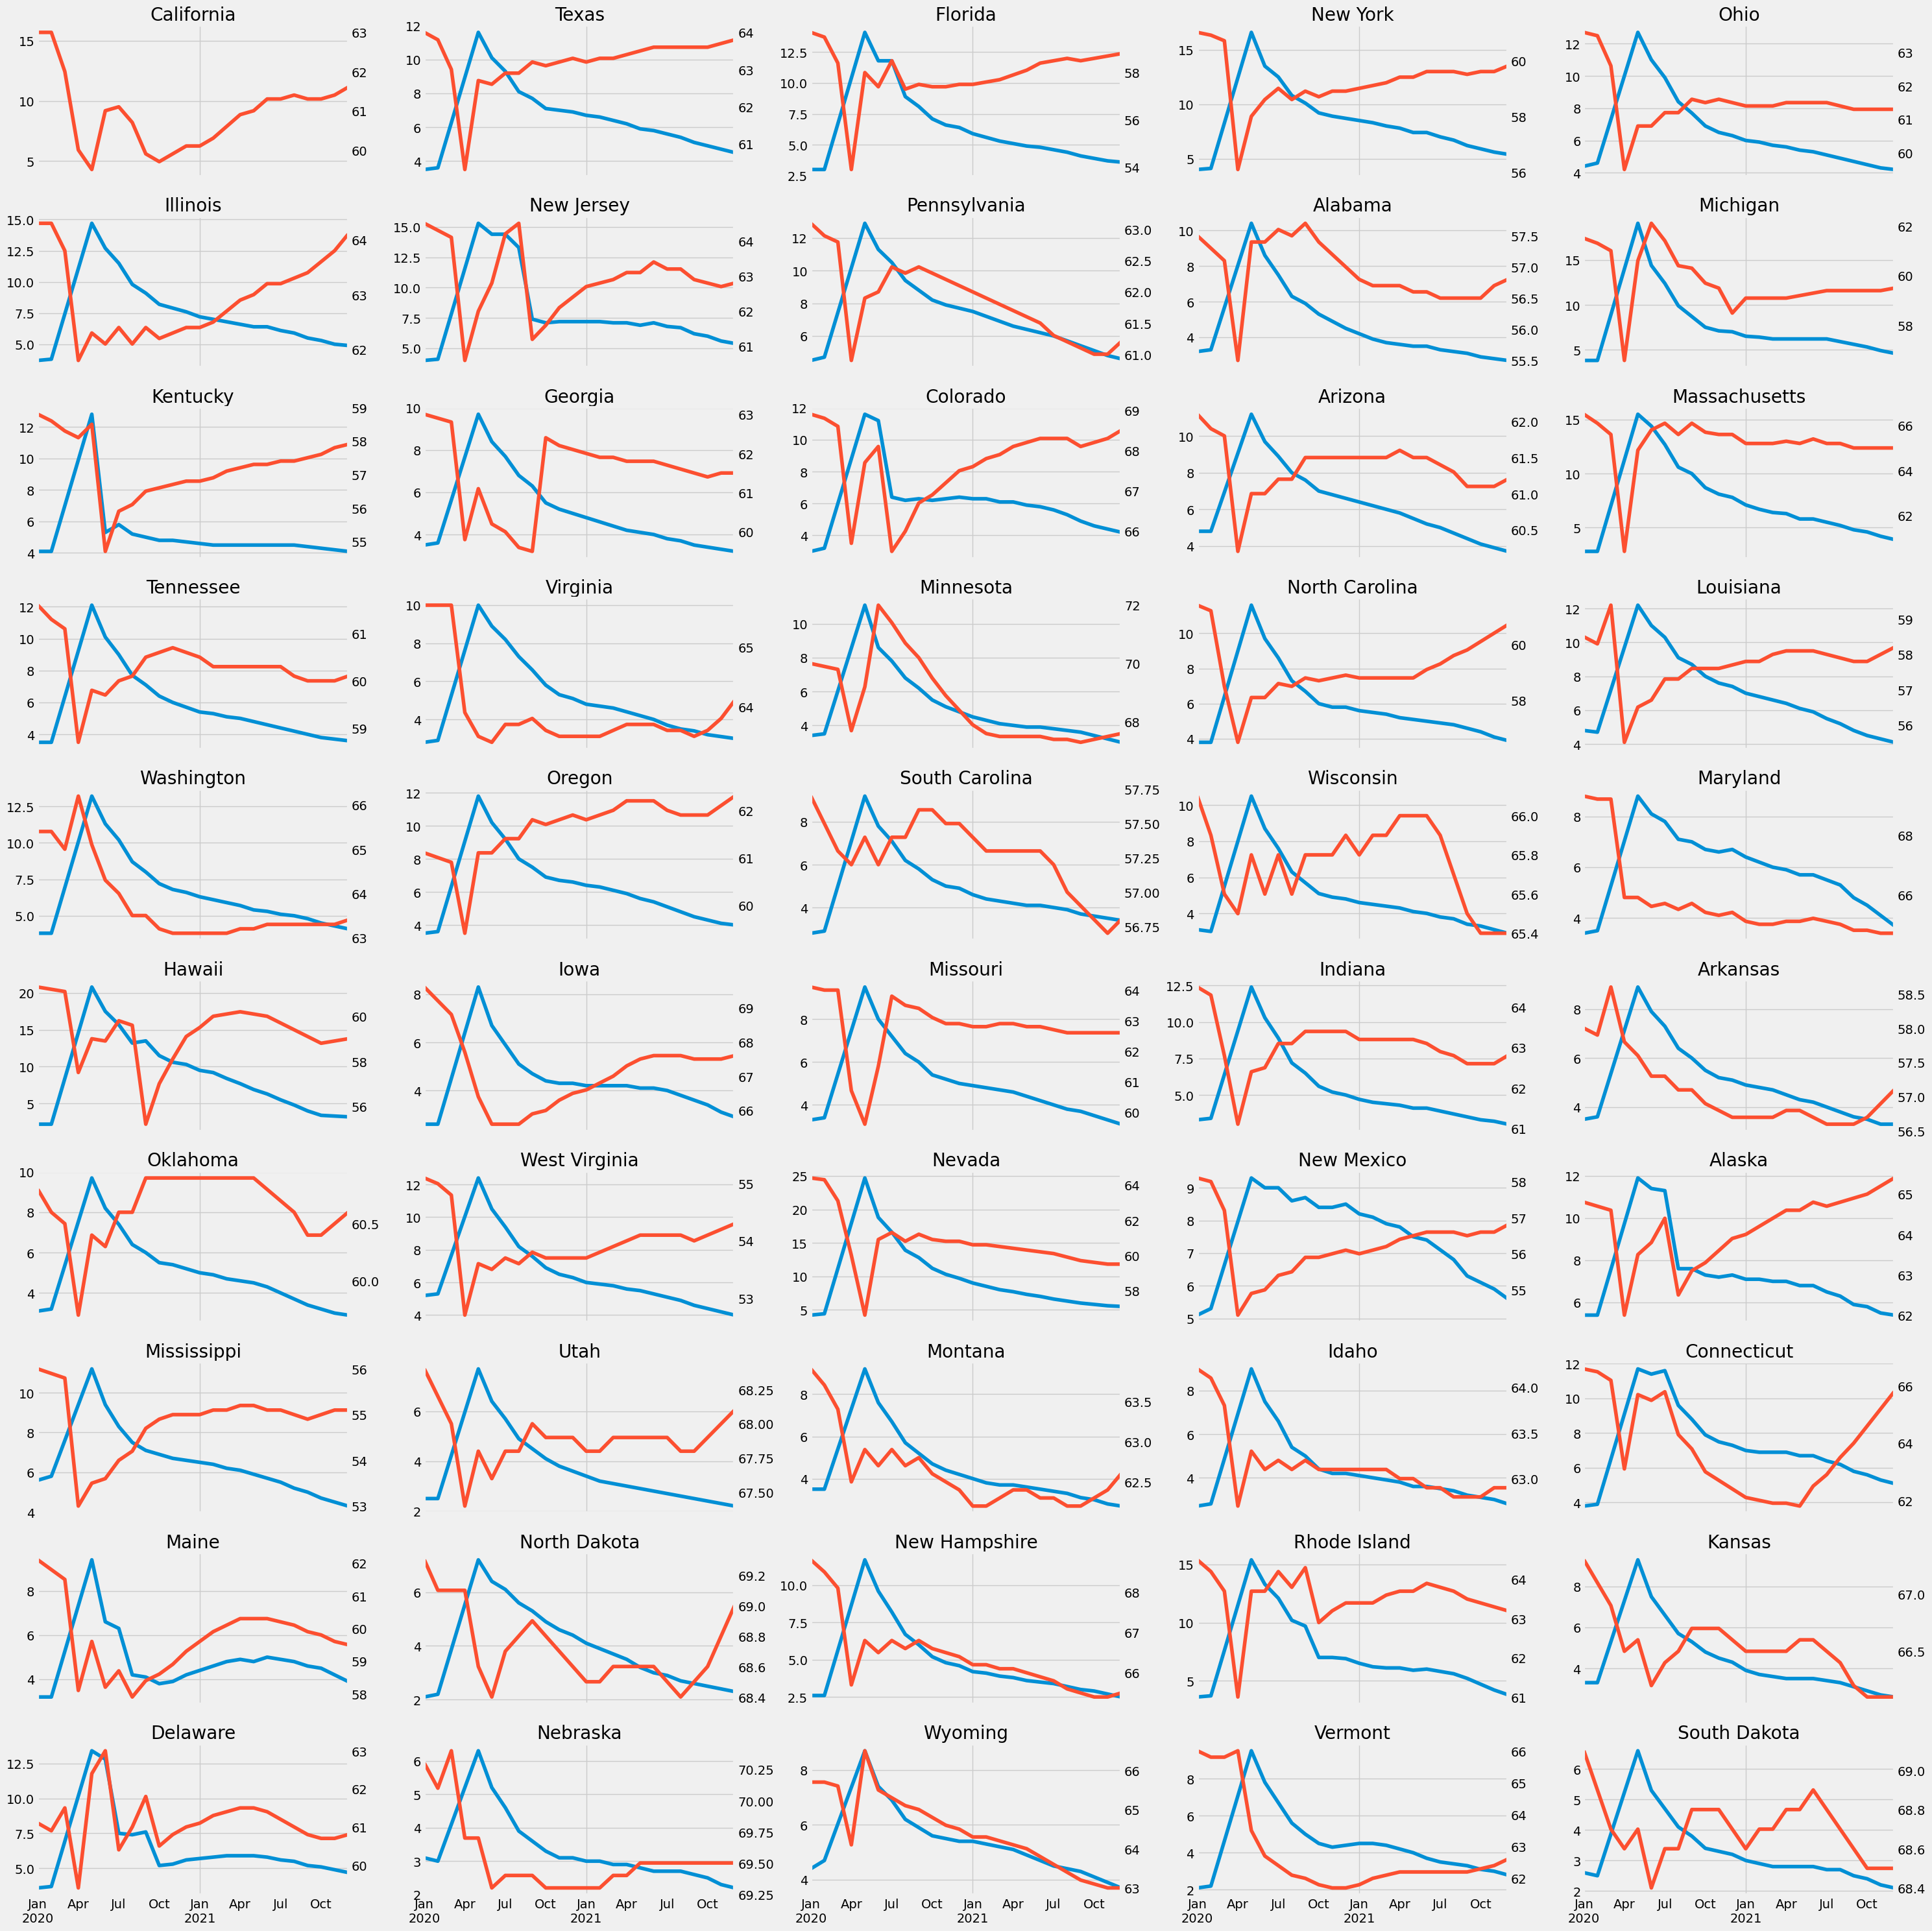

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()